# Detangled: a tool to pinpoint student confusion
by Enya, Erina, and Laura

## About
Short description

## How to use
1. Step one
2. Step two
3. Step three

In [2]:
# where to create or find rubric data file
# path = r'/Users/enya/Downloads/cms.594_edtechdesign' #path = Path(r'path/to/dir')
# fname = path + '/rubric.csv'
fname = 'Final_scores.csv'

In [1]:
## setup environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import csv

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import matplotlib.font_manager
from matplotlib import cm

from heapq import nlargest

In [ ]:
# ## create random raw data -- rubric data of points lost

# #100 random student ids
# studentid = [] 
# for i in range(100):
#     studentid.append( ''.join([random.choice(string.digits) for n in range(5)]))
    
# headerList = ['student', "energyA", "kinematicsA", "mathA", "mathB", "graphC", "dimC"] #column names
# maxpts_dict = dict(zip(headerList[1:], [1, 1, 1, 2, 1, 1])) #total number of points in each concept
# maxpts = list(maxpts_dict.values())

# # random data
# enA = [np.random.choice(list(range(maxpts[0]+1)), p=[0.8, 0.2]) for x in range(100)]
# kinA = [np.random.choice(list(range(maxpts[1]+1)), p=[0.95, 0.05]) for x in range(100)]

# matA = [np.random.choice(list(range(maxpts[2]+1)), p=[0.75, 0.25]) for x in range(100)]
# matB = [np.random.choice(list(range(maxpts[3]+1)), p=[0.8, 0.05, 0.15]) for x in range(100)]

# grC = [np.random.choice(list(range(maxpts[4]+1)), p=[0.7, 0.3]) for x in range(100)]
# dimC = [np.random.choice(list(range(maxpts[5]+1)), p=[0.7, 0.3]) for x in range(100)]

# # generate file as csv in designated location
# with open(fname, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(headerList)
#     writer.writerow([None]+maxpts)
#     for i in range(100):
#         row = [studentid[i], enA[i], kinA[i], matA[i], matB[i], grC[i], dimC[i]]
#         writer.writerow(row)

In [ ]:
### Data Analysis

In [4]:
## read and analyze raw data csv file

df = pd.read_csv(fname)

# extract general information
ids = df.index.tolist()
concepts = list(df.columns[-10:])
students = list(df["Submission ID"])
tot_stud = len(students)
# maxpts = df.iloc[0].values[1:].tolist()
# maxpts_dict = {idx:float(df[idx][0]) for idx in concepts}
maxpts_dict = {idx:10.0 for idx in concepts}

In [6]:
## general breakdown of raw data

bd1 = {} # find students who lost points in each concept
bd1_pct = {} # % of total students who lost points in each concept
bd1_pct_wt = {} # % of total students who lost points in each concept weighted by number of points lost

for idx in concepts:
    bd1[idx] = {}
    bd1_pct[idx] = float()
    for i in ids:
        if f'{df[idx][i]}' != str(0):
            bd1[idx][f'{df["Submission ID"][i]}'] = float(df[idx][i])/maxpts_dict[idx]
            # bd1={'concept1':{'student':pts lost, 'student:pts lost', ...}, 'concept2': ...}
    bd1_pct_wt[idx] = round(sum([bd1[idx][i] for i in bd1[idx]])/tot_stud, 3)
    # bd1_pct_wt={'concept1':%, 'concept2'...}
    bd1_pct[idx] = round(len(bd1[idx])/tot_stud, 3)
    #bd1_pct={'concept1':%, 'concept2'...}

In [7]:
## find correlations within each concept

bd2 = [] #weighted pts (by # of pts lost) of students who lost pts in concept1 and concept2/3/etc.
bd2_pct = {} # % of students who lost pts in each concept pairing weighted by # of pts lost
for idx in concepts:
    s = len(bd1[idx])
    temp = [x for x in concepts if x != idx]
    for i in range(len(temp)):
        corr = [bd1[idx][v]*bd1[temp[i]][v] for v in bd1[idx] if v in bd1[temp[i]]]
        n = f'{idx}_{temp[i]}'
        bd2.append({n:corr})
#         print(idx,temp[i],corr,s)
        bd2_pct[n] = round(sum(corr)/s, 3)
    
# topic_bd = []
# topic_bd_pct = {}
# for idx in concepts:
#     s = len(bd1[idx])
#     temp = [x for x in concepts if x != idx]
#     for i in range(len(temp)):
#         corr = [bd1[idx][v] for v in bd1[idx] if v in bd1[temp[i]]]
#         n = f'{idx}_{temp[i]}'
#         topic_bd.append({n:corr})
#         topic_bd_pct[n] = round(len(corr)/s, 2)

In [ ]:
### Data Visualization

In [ ]:
## Historgrams from CSV rubric data
# for concept in concepts:
#     plt.hist(df[concept], 3)
#     plt.xlabel(concept)
#     plt.ylabel("Number of Students")
#     plt.title("")
#     plt.show()



In [ ]:
#Histogram of those who got energy wrong in q1a and at least one point off in the other questions
# name = concepts[0]
# data2 = df.loc[df[name] != 0]
# sums = [0,0,0,0,0]
# for index, row in data2.iterrows():
#     for index, concept in enumerate(concepts[1:]):
#         ptlost = row[concept]
#         if(ptlost!=0):
#             sums[index]+=1

# topics = concepts[1:]
# plt.bar(topics, sums)
# plt.title("Students who lost points on Kinematics a")
# plt.xlabel("Category")
# plt.ylabel("Number of Students")

In [8]:
# radar chart

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

<Figure size 432x288 with 0 Axes>

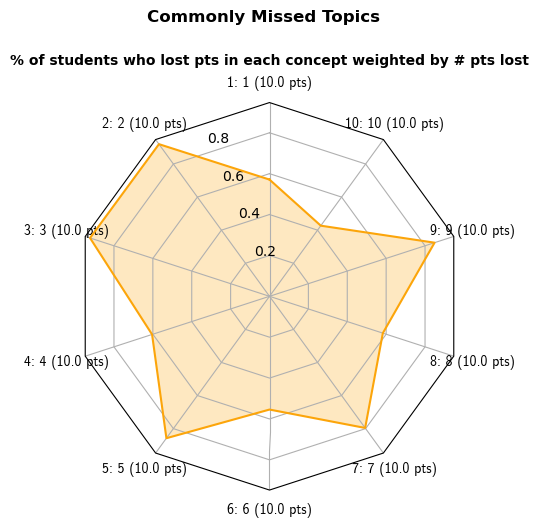

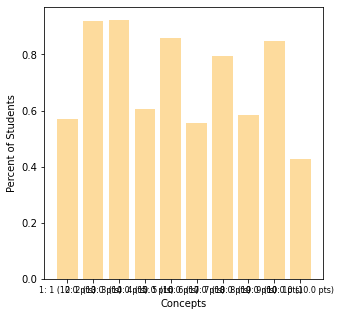

In [10]:
## plot general breakdown (bd1_pct_wt)

if __name__ == '__main__':
#     data = [
#         (concepts,'Overview', [[bd1_pct_wt[k] for k in concepts]]),
#         (concepts[1:],'With Concept1', [[bd2_pct[concepts[0]+f'_{k}'] for k in concepts[1:]]]),
#     ]
    data = [concepts,'% of students who lost pts in each concept weighted by # pts lost', [[bd1_pct_wt[k] for k in concepts]]]
#     data = [
#         (concepts[1:],'With Concept1', [[bd2_pct[concepts[0]+f'_{k}'] for k in concepts[1:]]])
#     ]
    
    plt.clf()
    
    #as radar chart
    cmap = cm.get_cmap('inferno')
    spoke_labels, title, case_data = data
    theta = radar_factory(len(spoke_labels), frame='polygon')
    
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.set_title(title, weight='bold', size='medium', position=(0.5, 0.5), horizontalalignment='center', verticalalignment='bottom')
    ax.plot(theta, case_data[0], color=cmap(0.8))
    ax.fill(theta, case_data[0], facecolor=cmap(0.8), alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)
    ax.set_rgrids([0.2 + 0.2*i for i in range(4)])
#     print(len(spoke_labels))
#     print(ax.get_xticklabels())
    for tick in ax.get_xticklabels():
        tick.set_fontname("cmss10")

    # add legend relative to top-left plot
#     labels = ()
#     legend = axs[1].legend(labels, loc=(0.9, .95), labelspacing=0.1, fontsize='small')

    fig.text(0.5, 1, 'Commonly Missed Topics', horizontalalignment='center', color='black', weight='bold', size='large')
    
    fig.set_dpi(100)
    plt.show()
    
    #as histogram
    fig1 = plt.subplots(figsize=(5, 5))
    plt.bar(data[0], data[2][0], color=cmap(0.8), alpha = 0.4)
    plt.xticks(data[0], fontsize=8)
    plt.xlabel('Concepts')
    plt.ylabel('Percent of Students')
    plt.show()

    
#     plt.hist()
#     for concept in concepts:
#         plt.hist(df[concept], 3)
#         plt.xlabel(concept)
#         plt.ylabel("Percent of Students")
#         plt.title("")
#         plt.show()
    

<Figure size 432x288 with 0 Axes>

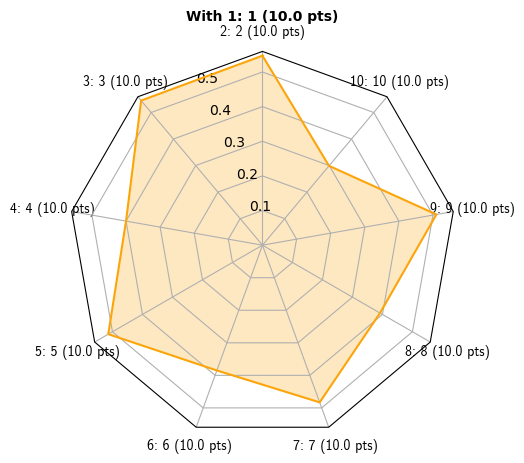

<Figure size 432x288 with 0 Axes>

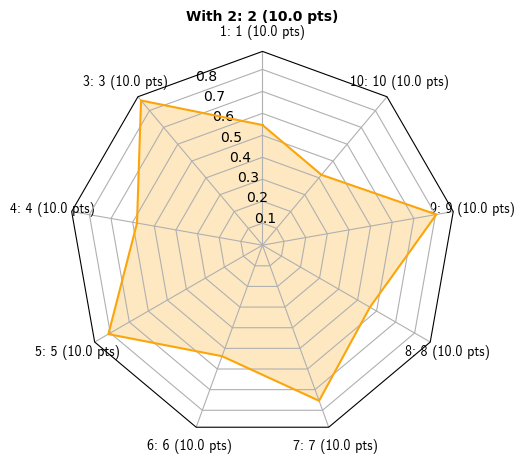

<Figure size 432x288 with 0 Axes>

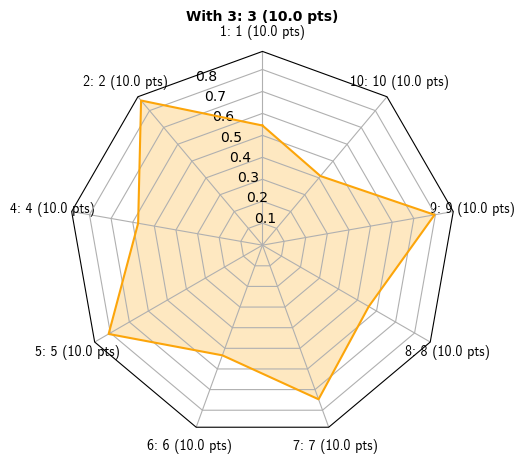

<Figure size 432x288 with 0 Axes>

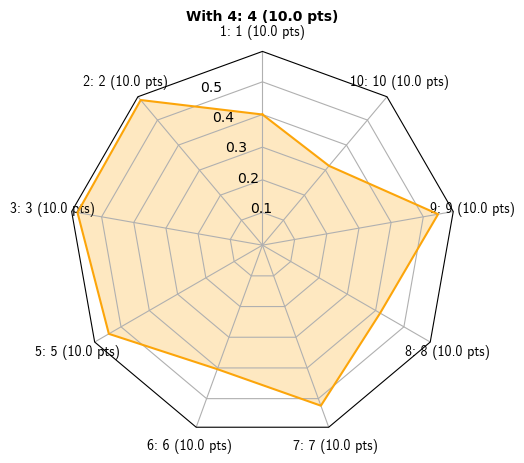

<Figure size 432x288 with 0 Axes>

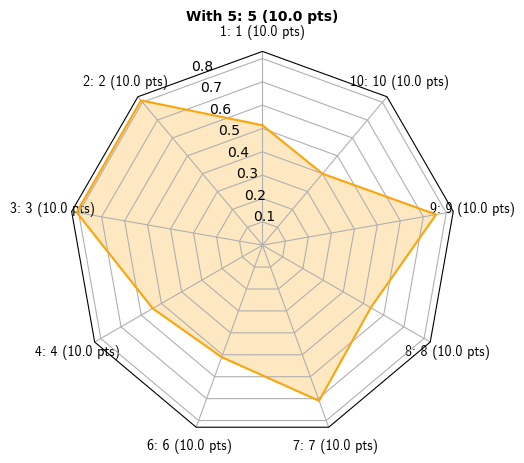

<Figure size 432x288 with 0 Axes>

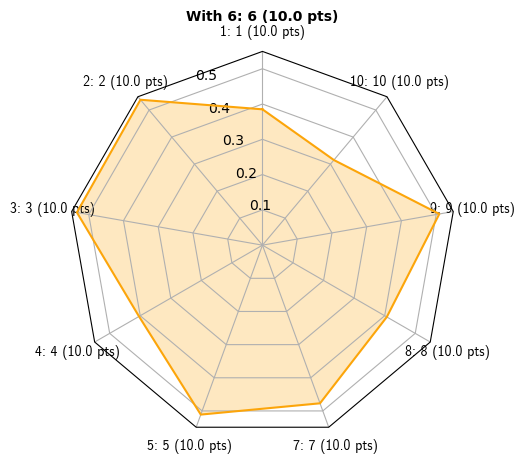

<Figure size 432x288 with 0 Axes>

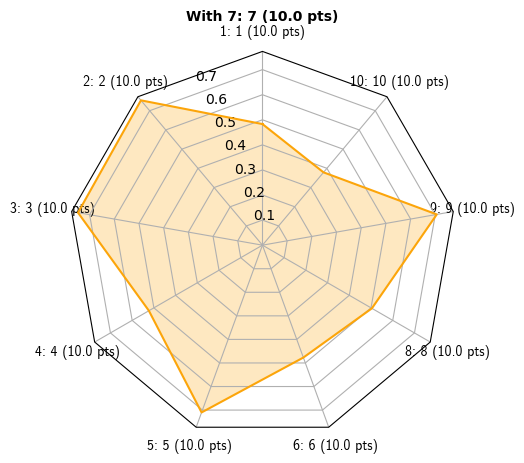

<Figure size 432x288 with 0 Axes>

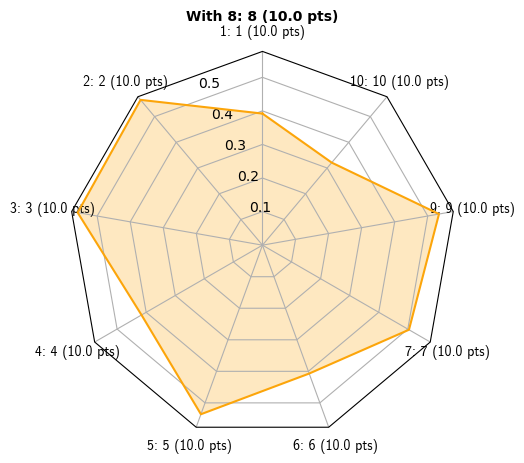

<Figure size 432x288 with 0 Axes>

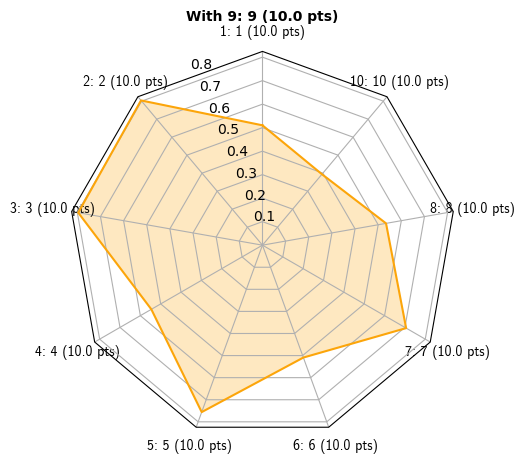

In [12]:
## plot concept correlations (bd2_pct)

if __name__ == '__main__':
    
    #mainfig = plt.figure(constrained_layout=True)
    #figs = fig.add_gridspec((len(concepts)-1, 1)
    figs=[]
    
    for i in range(len(concepts)-1):
        fig = plt.figure(i)
        #figs.append(fig)
        plt.clf()
        
        #data = [concepts[1:],'With Concept1', [bd2_pct[concepts[0]+f'_{k}'] for k in concepts[1:]]]
        spoke_labels = [x for x in concepts if x != concepts[i]]
        title = f'With {concepts[i]}'
        #title = ''
        case_data = [bd2_pct[concepts[i]+f'_{k}'] for k in spoke_labels]
        data = [spoke_labels, title, case_data]
        theta = radar_factory(len(spoke_labels), frame='polygon')

        cmap = cm.get_cmap('inferno')

        fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),horizontalalignment='center', verticalalignment='center')
        ax.plot(theta, case_data, color=cmap(0.8))
        ax.fill(theta, case_data, facecolor=cmap(0.8), alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)
#         ax.set_rgrids([0.1, 0.15, 0.2, 0.25])
        for tick in ax.get_xticklabels():
            tick.set_fontname("cmss10")

            # add legend relative to top-left plot
        #     labels = ()
        #     legend = axs[1].legend(labels, loc=(0.9, .95), labelspacing=0.1, fontsize='small')

        fig.set_dpi(100)
        #fig.suptitle(f'With {concepts[i]}')
        plt.show()
        figs.append(fig)
        
    #figs[0].suptitle('Correlations in performance on different topics', horizontalalignment='center', color='black', weight='bold', size='large')
    #fig.text(0.5, 1, 'Correlations in performance on different topics', horizontalalignment='center', color='black', weight='bold', size='large')



<Figure size 432x288 with 0 Axes>

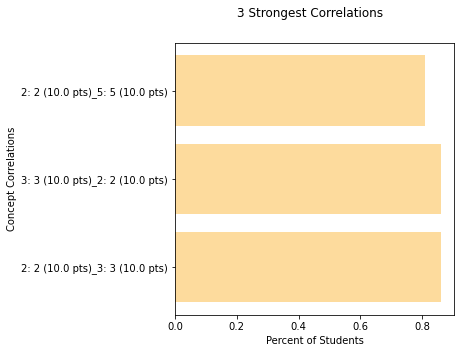

In [13]:
## display top 3 concept correlations

top3 = nlargest(3, bd2_pct, key=bd2_pct.get)
top3 = dict(zip(top3, (bd2_pct.get(conc) for conc in top3)))

plt.clf()
fig = plt.figure(figsize=(5, 5))
plt.barh(list(top3.keys()), list(top3.values()), color=cmap(0.8), alpha = 0.4)
plt.ylabel('Concept Correlations')
plt.xlabel('Percent of Students')
plt.suptitle('3 Strongest Correlations')
plt.show()
